In [43]:
import numpy as np
from matplotlib import pyplot



## Functions

In [44]:
class Function:
    @staticmethod
    def sphere(x, y):
        return x**2 + y**2

    @staticmethod
    def schwefel(x, y):
        return 418.9829 * 2 - x * np.sin(np.sqrt(abs(x))) - y * np.sin(np.sqrt(abs(y)))


    @staticmethod
    def rosenbrock(x, y):
        return (1 - x)**2 + 100 * (y - x**2)**2

    @staticmethod
    def rastrigin(x, y):
        term = 10 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))
        return x**2 + y**2 - term + 20

    @staticmethod
    def griewangk(x, y):
        left = (x**2 + y**2) / 4000
        right = np.cos(x / np.sqrt(2)) * np.cos(y / np.sqrt(2))
        return left - right + 1

    @staticmethod
    def levy(x, y):
        sin_3pi_x = np.sin(3 * np.pi * x)
        sin_3pi_y = np.sin(3 * np.pi * y)
        return sin_3pi_x**2 + (x - 1)**2 * (1 + sin_3pi_y**2) + (y - 1)**2 * (1 + np.sin(2 * np.pi * y)**2)

    @staticmethod
    def michalewicz(x, y):
        sin_x = np.sin(x)
        sin_y = np.sin(y)
        return -1 * (sin_x * np.sin((1 * x**2) / np.pi)**20 + sin_y * np.sin((2 * y**2) / np.pi)**20)

    @staticmethod
    def zakharov(x, y):
        term = 0.5 * x + y
        return x**2 + y**2 + term**2 + term**4

    @staticmethod
    def ackley(x, y):
        term_1 = -0.2 * np.sqrt(0.5 * (x**2 + y**2))
        term_2 = np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)
        return -20 * np.exp(term_1) - np.exp(0.5 * term_2) + np.e + 20


## Solution

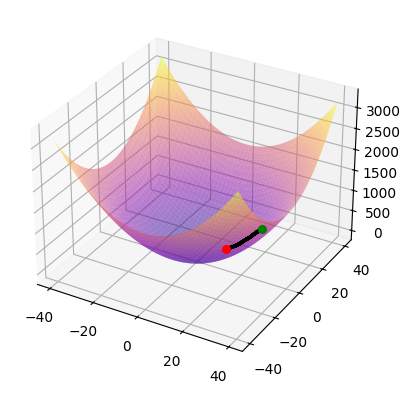

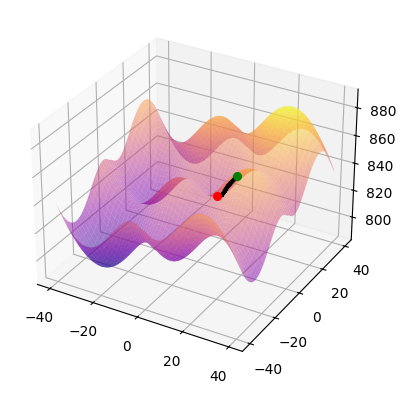

In [46]:
LOWER_BOUND = -10.0
UPPER_BOUND = 10.0
POINT_SPACING = 0.01
DIMENSION = "3d"

class Solution:
    def __init__(self, dimension:str=DIMENSION, lower_bound:float=LOWER_BOUND, upper_bound:float=UPPER_BOUND, point_spacing:float=POINT_SPACING, function=None):
        self.dimension = dimension
        self.lower_bound = lower_bound  
        self.upper_bound = upper_bound
        self.function = function
        # Points in given range
        self.raw_points = np.arange(self.lower_bound, self.upper_bound, point_spacing)
        # Create meshgrid - matrices from X and Y points
        self.surface_x, self.surface_y = np.meshgrid(self.raw_points, self.raw_points)
        # Generate Z coordinate from given function
        self.surface_z = self.function(self.surface_x, self.surface_y)
        self.init_plot()

    def init_plot(self):
        self.figure = pyplot.figure(figsize=(16,10))
        self.plot = self.figure.add_subplot(131, projection=self.dimension, computed_zorder=False)
        self.plot.plot_surface(self.surface_x, self.surface_y, self.surface_z, cmap='plasma', alpha=0.5, zorder=1)

    def plot_points(self, points, color="black", size:int=2, zorder:int=2):
        # Extract x, y, z coordinates from points
        x_points, y_points, z_points = zip(*points)
        self.plot.scatter(x_points, y_points, z_points, c=color, s=size, zorder=zorder)

    def hill_climb_racing_search(self, generations : int, generations_children : int, neighbour_range : float):
        # Generate random first point and set it as best
        x = np.random.randint(self.lower_bound, self.upper_bound)
        y = np.random.randint(self.lower_bound, self.upper_bound)
        z = self.function(x, y)
        best_point = (x, y, z)
        start_point = (x, y, z)
        all_points = []

        # Create generations
        for _ in range(0, generations):
            generation = []

            # Each generation creates another points and selects the best one
            for _ in range(0, generations_children):
                x = np.random.uniform((best_point[0] - neighbour_range), (best_point[0] + neighbour_range))
                y = np.random.uniform((best_point[1] - neighbour_range), (best_point[1] + neighbour_range))
                z = self.function(x, y)
                generation.append((x,y,z))

            all_points = all_points + generation

            # Save best point as current best and continue with that point in next generations
            for g in generation:
                if g[2] < best_point[2]:
                    best_point = (g[0], g[1], g[2])

        # Return all points, best one and starting one
        return best_point, all_points, start_point


functions = [
    Function.sphere,
    Function.schwefel,
    Function.rosenbrock,
    Function.rastrigin,
    Function.griewangk,
    Function.levy,
    Function.michalewicz,
    Function.zakharov,
    Function.ackley
]

# Iterate over each function and generate the graph
for func in functions:
    solution = Solution(DIMENSION, LOWER_BOUND, UPPER_BOUND, POINT_SPACING, func)

    hill_climb_best_point, hill_climb_all_points, hill_climb_start_point = solution.hill_climb_racing_search(200, 5, 0.1)
    solution.plot_points(hill_climb_all_points, color='black', size=2, zorder=2)
    solution.plot_points([hill_climb_best_point], color='red', size=30, zorder=3)
    solution.plot_points([hill_climb_start_point], color='green', size=30, zorder=3)

    pyplot.show()